In [1]:
!pip install tensorflow

In [2]:
import os
import urllib.request
import zipfile
import tensorflow as tf
from tensorflow.keras import layers, models


In [3]:
def download_and_extract_data():
    dataset_path = "germantrafficsigns"
    if not os.path.exists(dataset_path):
        url = 'http://storage.googleapis.com/download.tensorflow.org/data/certificate/germantrafficsigns.zip'
        urllib.request.urlretrieve(url, 'germantrafficsigns.zip')
        with zipfile.ZipFile('germantrafficsigns.zip', 'r') as zip_ref:
            zip_ref.extractall()


In [4]:
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label


In [6]:
import os
import urllib.request
import zipfile

def download_and_extract_data():
    dataset_path = "germantrafficsigns"
    if not os.path.exists(dataset_path):
        url = 'http://storage.googleapis.com/download.tensorflow.org/data/certificate/germantrafficsigns.zip'
        urllib.request.urlretrieve(url, 'germantrafficsigns.zip')
        with zipfile.ZipFile('germantrafficsigns.zip', 'r') as zip_ref:
            zip_ref.extractall()

download_and_extract_data()


In [7]:
import tensorflow as tf

def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label


In [10]:
BATCH_SIZE = 32
IMG_SIZE = (30, 30)

train_dir = "train"
val_dir = "validation"

BATCH_SIZE = 32
IMG_SIZE = (30, 30)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    label_mode="int",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    label_mode="int",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

train_ds = train_ds.map(preprocess).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.map(preprocess).prefetch(tf.data.AUTOTUNE)


Found 31367 files belonging to 43 classes.
Found 7842 files belonging to 43 classes.


In [11]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(30, 30, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),  # Untuk cegah overfitting
    layers.Dense(43, activation='softmax')  # 43 kelas
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Latih model
history = model.fit(train_ds, epochs=15, validation_data=val_ds)


Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


981/981 ━━━━━━━━━━━━━━━━━━━━ 55s 53ms/step - accuracy: 0.2642 - loss: 2.6700 - val_accuracy: 0.8518 - val_loss: 0.5099
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 44s 45ms/step - accuracy: 0.8383 - loss: 0.5327 - val_accuracy: 0.9361 - val_loss: 0.2156
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 84s 46ms/step - accuracy: 0.9249 - loss: 0.2417 - val_accuracy: 0.9612 - val_loss: 0.1387
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 44s 45ms/step - accuracy: 0.9489 - loss: 0.1653 - val_accuracy: 0.9760 - val_loss: 0.0849
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 45s 45ms/step - accuracy: 0.9659 - loss: 0.1122 - val_accuracy: 0.9841 - val_loss: 0.0595
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 81s 44ms/step - accuracy: 0.9728 - loss: 0.0875 - val_accuracy: 0.9776 - val_loss: 0.0830
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 43s 43ms/step - accuracy: 0.9753 - loss: 0.0770 - val_accuracy: 0.9855 - val_loss: 0.0572
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 84s 46ms/step - accuracy: 0.9817 - loss: 0.0587 - val_accurac

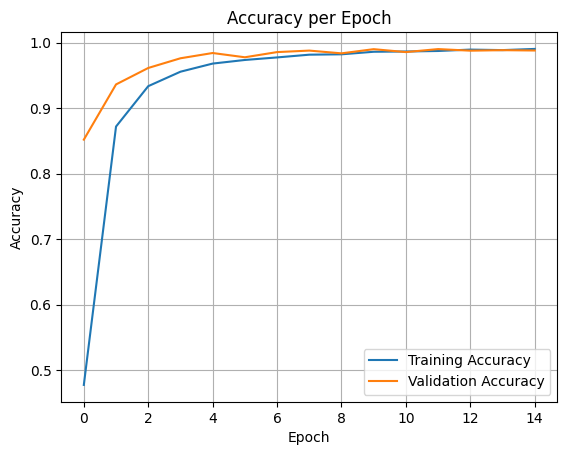

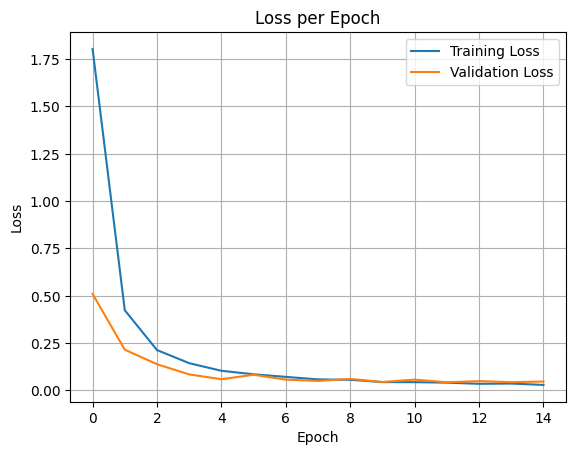

In [12]:
import matplotlib.pyplot as plt

# Plot akurasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [13]:
model.save("traffic_sign_classifier.h5")
